In [27]:
import sys
import os

sys.path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path


['',
 '/opt/anaconda3/lib/python36.zip',
 '/opt/anaconda3/lib/python3.6',
 '/opt/anaconda3/lib/python3.6/lib-dynload',
 '/opt/anaconda3/lib/python3.6/site-packages',
 '/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/home/desenfirman/.ipython',
 '/media/Data/desenfirman/development/som-clustering-knn-imputation']

In [28]:
from main_algorithm import self_organizing_maps as som
from main_algorithm import knn_imputation as knn
    

In [ ]:
def silhouette_visualizer(trained_weight, dataset):
    silhouette_res = som.silhouette(trained_weight, dataset)
    import matplotlib.pyplot as plt
    import random as rd
    fig, ax = plt.subplots()
    
    x = list()
    y = list()
    
    cmap = list()
    
    count = 1
    for idj, cluster in silhouette_res.items():
        if idj != 'avg':
            random_color = (rd.random(), rd.random(), rd.random(), 0.25)
            for i in cluster:
                x.append(i[1])
                y.append(count)
                cmap.append(random_color)
                count += 1
                
    ax.barh(y, x)
    ax.barh(y, [1] * len(dataset), color=cmap)
    ax.get_yaxis().set_ticks([])
    ax.axvline(silhouette_res['avg'], ls='--', color='r')
    plt.text(silhouette_res['avg'], len(dataset) + 5, 'avg silhouette: ' + str(round(silhouette_res['avg'], 2)))
    title = 'Silhouette Result of ' + str(len(silhouette_res) - 1) + ' Cluster(s)\n\n'
    plt.title(title)
    plt.xlabel('Silhouette Score')
    plt.ylabel('Input dataset')
    plt.show()

Silhouette data 0 Cluster  1;2; : 0.5138943066870314
Silhouette data 1 Cluster  1;2; : 0.1680393858203587
Silhouette data 2 Cluster  1;2; : 0.2713926522605402
Silhouette data 3 Cluster  1;2; : 0.4379059779502703
Silhouette data 4 Cluster  1;2; : 0.43067080937154006
Silhouette data 5 Cluster  1;2; : -0.013898023328504358
Silhouette data 6 Cluster  1;2; : 0.2454789893442351
Silhouette data 7 Cluster  1;2; : 0.489383516502734
Silhouette data 9 Cluster  1;2; : 0.10793501725856186
Silhouette data 10 Cluster  1;2; : 0.29384227840421434
Silhouette data 11 Cluster  1;2; : 0.5818502584183236
Silhouette data 12 Cluster  1;2; : 0.23492953921484078
Silhouette data 13 Cluster  1;2; : 0.4134575067263591
Silhouette data 14 Cluster  1;2; : 0.4195747751990124
Silhouette data 15 Cluster  1;2; : 0.3260087032827146
Silhouette data 16 Cluster  1;2; : 0.3387959503466058
Silhouette data 17 Cluster  1;2; : 0.32760830479853653
Silhouette data 18 Cluster  1;2; : 0.4231832009655193
Silhouette data 19 Cluster  1;

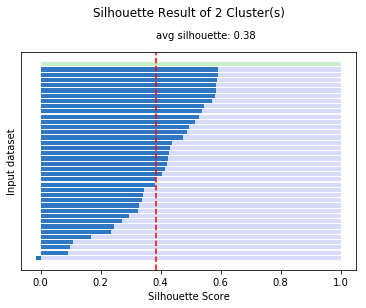

In [53]:
# Load dataset to jupyter notebook
from pandas import read_csv
import random

def extract_dataset(file):
    dataset = read_csv(file)
    new_columns = dataset.columns.values
    new_columns[0] = 'First_Column'
    dataset.columns = new_columns
    dataset = dataset.set_index('First_Column')
    raw_dataset = dataset
    return raw_dataset

dataset = extract_dataset("../dataset_used/dataset_PMKS.csv")
dataset

dataset_used = dataset.iloc[:, :].values
dataset_knn_ed = knn.impute_dataset(dataset_used, 0)
dataset_norm = som.normalize_data(dataset_knn_ed)

attr_size = len(dataset_used[0])
weight = som.init_som_net(3, 3, attr_size)
trained_weight = som.training(dataset_norm, weight, 100, 0.8, 0.2)
silhouette_visualizer(trained_weight, dataset_norm)


# Pengujian parameter nilai learning rate (alpha)

Nilai yang akan diujikan
- 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1

Variabel kontrol
- Nilai eta = 0.1
- Jumlah epoch = 200
- Jumlah neuron = 5x5
- Nilai K = 0

In [ ]:
from IPython.display import clear_output
from time import sleep
from pandas import DataFrame as df

# value to be tested
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# parameter control
eta = 0.1
epoch = 200
jumlah_neuron = (5,5)
k = 0

n_test = 10

qes = dict()


dataset_used = dataset.iloc[:, :].values
dataset_knn_ed = knn.impute_dataset(dataset_used, k)
dataset_norm = som.normalize_data(dataset_knn_ed)

for alpha in alphas:
    sum_all = 0
    qe_n = dict()
    for n in range(n_test):
        attr_size = len(dataset_used[0])
        print("Alpha: {0}, Eta: {1}, Epoch: {2}, Jumlah Neuron:{3}, K: {4} Try: {5}".format(alpha, eta, epoch, jumlah_neuron, k, n+1), end='\n')
        weight = som.init_som_net(jumlah_neuron[0], jumlah_neuron[1], attr_size)
        trained_weight = som.training(dataset_norm, weight, epoch, alpha, eta)
        qe = som.average_silhouette(trained_weight, dataset_norm)
        print("\nQE: {0}".format(qe), end='\n', flush=True)
        qe_n[n + 1] = qe
        sum_all += qe
    qe_n['avg'] = sum_all / n_test
    qes[str(alpha)] = qe_n
    clear_output()

(df.from_dict(qes)).to_csv('silhouette_test/alpha_testing.csv')

# Pengujian parameter nilai signifikasi update bobot (eta)

Nilai yang akan diujikan
- 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1

Variabel kontrol
- Nilai alpha = 1
- Jumlah epoch = 200
- Jumlah neuron = 5x5
- Nilai K = 0

In [ ]:
from IPython.display import clear_output
from time import sleep
from pandas import DataFrame as df

# value to be tested
etas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# parameter control
alpha = 0.8
epoch = 200
jumlah_neuron = (5,5)
k = 0

n_test = 10

qes = dict()


dataset_used = dataset.iloc[:, :].values
dataset_knn_ed = knn.impute_dataset(dataset_used, k)
dataset_norm = som.normalize_data(dataset_knn_ed)

for eta in etas:
    sum_all = 0
    qe_n = dict()
    for n in range(n_test):
        attr_size = len(dataset_used[0])
        print("Alpha: {0}, Eta: {1}, Epoch: {2}, Jumlah Neuron:{3}, K: {4} Try: {5}".format(alpha, eta, epoch, jumlah_neuron, k, n+1), end='\n')
        weight = som.init_som_net(jumlah_neuron[0], jumlah_neuron[1], attr_size)
        trained_weight = som.training(dataset_norm, weight, epoch, alpha, eta)
        qe = som.average_silhouette(trained_weight, dataset_norm)
        print("\nQE: {0}".format(qe), end='\n', flush=True)
        qe_n[n + 1] = qe
        sum_all += qe
    qe_n['avg'] = sum_all / n_test
    qes[str(eta)] = qe_n

(df.from_dict(qes)).to_csv('silhouette_test/eta_testing.csv')

# Pengujian parameter jumlah epoch

Nilai yang akan diujikan
- 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200

Variabel kontrol
- Nilai alpha = 0.5
- Nilai eta = 0.5
- Jumlah neuron = 5x5
- Nilai K = 0

In [ ]:
from IPython.display import clear_output
from time import sleep
from pandas import DataFrame as df

# value to be tested
epochs = [10, 20, 30, 50, 80, 130, 210, 340, 550, 890]

# parameter control
alpha = 0.8
eta = 0.2
jumlah_neuron = (5,5)
k = 0

n_test = 10

qes = dict()


dataset_used = dataset.iloc[:, :].values
dataset_knn_ed = knn.impute_dataset(dataset_used, k)
dataset_norm = som.normalize_data(dataset_knn_ed)

for epoch in epochs:
    sum_all = 0
    qe_n = dict()
    for n in range(n_test):
        attr_size = len(dataset_used[0])
        print("Alpha: {0}, Eta: {1}, Epoch: {2}, Jumlah Neuron:{3}, K: {4} Try: {5}".format(alpha, eta, epoch, jumlah_neuron, k, n+1), end='\n')
        weight = som.init_som_net(jumlah_neuron[0], jumlah_neuron[1], attr_size)
        trained_weight = som.training(dataset_norm, weight, epoch, alpha, eta)
        qe = som.average_silhouette(trained_weight, dataset_norm)
        print("\nQE: {0}".format(qe), end='\n', flush=True)
        qe_n[n + 1] = qe
        sum_all += qe
    qe_n['avg'] = sum_all / n_test
    qes[str(epoch)] = qe_n

(df.from_dict(qes)).to_csv('silhouette_test/epoch_testing.csv')

# Pengujian parameter nilai jumlah neuron

Nilai yang akan diujikan
- 2x2, 3x3, 4x4, 5x5

Variabel kontrol
- Nilai alpha = 1
- Nilai eta = 0.7
- Jumlah epoch = 600
- Nilai K = 0

In [ ]:
from IPython.display import clear_output
from time import sleep
from pandas import DataFrame as df
import json

# value to be tested
eta = 0.2

# parameter control
alpha = 0.8
epoch = 233
jumlah_neurons = [(2,2), (3,3), (4,4), (5,5)]
k = 0

n_test = 10

qes = dict()


dataset_used = dataset.iloc[:, :].values
dataset_knn_ed = knn.impute_dataset(dataset_used, k)
dataset_norm = som.normalize_data(dataset_knn_ed)

def cluster_build(dataset_indexes, dataset_input, trained_weight):
    cluster_result = dict()
    cls_list = list()
    for idx, x_data in enumerate(dataset_input):
        indexes = dataset_indexes[idx]
        c = som.penentuan_cluster(trained_weight, x_data)
        cls_id = str(c[0]) + ';' + str(c[1]) + ';'
        if cls_id not in cls_list:
            cls_list.append(cls_id)
            cluster_result[cls_id] = list()
        cluster_result[cls_id].append(indexes)
    return cluster_result
    

for jumlah_neuron in jumlah_neurons:
    sum_all = 0
    qe_n = dict()
    max_qe = -999999
    for n in range(n_test):
        attr_size = len(dataset_used[0])
        print("Alpha: {0}, Eta: {1}, Epoch: {2}, Jumlah Neuron:{3}, K: {4} Try: {5}".format(alpha, eta, epoch, jumlah_neuron, k, n+1), end='\n')
        weight = som.init_som_net(jumlah_neuron[0], jumlah_neuron[1], attr_size)
        trained_weight = som.training(dataset_norm, weight, epoch, alpha, eta)
        qe = som.average_silhouette(trained_weight, dataset_norm)
        print("\nQE: {0}".format(qe), end='\n', flush=True)
        qe_n[n + 1] = qe
        sum_all += qe
        
        if qe > max_qe:
            max_qe = qe
            cls_result = cluster_build(dataset.index, dataset_norm, trained_weight)
            cls_result['score'] = max_qe
            with open('neuron_test_result/' + str(jumlah_neuron) + 'sil.json', 'w') as file:
                file.write(json.dumps(cls_result))
    qe_n['avg'] = sum_all / n_test
    qes[str(jumlah_neuron)] = qe_n

(df.from_dict(qes)).to_csv('silhouette_test/jumlah_neuron_testing.csv')

# Pengujian parameter nilai K

Nilai yang akan diujikan
- 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1

Variabel kontrol
- Nilai eta = 0.5
- Jumlah epoch = 200
- Jumlah neuron = 5x5
- Nilai K = 0

In [ ]:
from IPython.display import clear_output
from time import sleep
from pandas import DataFrame as df

# value to be tested
epochs = [13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

# parameter control
alpha = 0.1
eta = 0.7
jumlah_neuron = (5,5)
k = 0

n_test = 10

qes = dict()


dataset_used = dataset.iloc[:, :].values
dataset_knn_ed = knn.impute_dataset(dataset_used, k)
dataset_norm = som.normalize_data(dataset_knn_ed)

for epoch in epochs:
    sum_all = 0
    qe_n = dict()
    for n in range(n_test):
        attr_size = len(dataset_used[0])
        print("Alpha: {0}, Eta: {1}, Epoch: {2}, Jumlah Neuron:{3}, K: {4} Try: {5}".format(alpha, eta, epoch, jumlah_neuron, k, n+1), end='\n')
        weight = som.init_som_net(jumlah_neuron[0], jumlah_neuron[1], attr_size)
        trained_weight = som.training(dataset_norm, weight, epoch, alpha, eta)
        qe = som.quantization_error(trained_weight, dataset_norm)
        print("\nQE: {0}".format(qe), end='\n', flush=True)
        qe_n[n + 1] = qe
        sum_all += qe
            
    qe_n['avg'] = sum_all / n_test
    qes[str(epoch)] = qe_n

# (df.from_dict(qes)).to_csv('epoch_testing_2.csv')

In [ ]:
a = dict()
len(a)